In [32]:
from langgraph.graph import StateGraph, START, END, MessagesState

In [33]:
from utils import get_llm, draw_graph

In [34]:
class MyState(MessagesState):
    usr_msg: str

In [35]:
llm = get_llm()
def greeting(state: MyState):
    response = llm.invoke(state['usr_msg'])
    return {"messages": [response]}

In [36]:
msg_graph = StateGraph(MyState)
msg_graph.add_node("Hi from LLM", greeting)
msg_graph.set_entry_point("Hi from LLM")
msg_graph.set_finish_point("Hi from LLM")


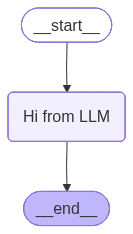

In [37]:
no_mem_graph = msg_graph.compile()
no_mem_graph

In [38]:
no_mem_graph.invoke({'messages':[], 'usr_msg':"What is the capital of France?"})

{'messages': [AIMessage(content='The capital of France is **Paris**.', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 7, 'candidates_token_count': 8, 'total_token_count': 15, 'prompt_tokens_details': [{'modality': 1, 'token_count': 7}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 8}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.0032640420831739902, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash-lite'}, id='lc_run--5178df5c-3f1d-4edd-9d7b-932b6804b41b-0', usage_metadata={'input_tokens': 7, 'output_tokens': 8, 'total_tokens': 15, 'input_token_details': {'cache_read': 0}})],
 'usr_msg': 'What is the capital of France?'}

In [39]:
no_mem_graph.invoke({'messages':[], 'usr_msg':"What is the capital of India?"})

{'messages': [AIMessage(content='The capital of India is **New Delhi**.', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 7, 'candidates_token_count': 9, 'total_token_count': 16, 'prompt_tokens_details': [{'modality': 1, 'token_count': 7}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 9}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.00016349317350735268, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash-lite'}, id='lc_run--96cd9093-c1b6-4390-a650-4eea93802f31-0', usage_metadata={'input_tokens': 7, 'output_tokens': 9, 'total_tokens': 16, 'input_token_details': {'cache_read': 0}})],
 'usr_msg': 'What is the capital of India?'}

In [40]:
response = no_mem_graph.invoke({'messages':[], 'usr_msg': "What is the capital of USA?"})
response

{'messages': [AIMessage(content='The capital of the USA is **Washington, D.C.**', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 7, 'candidates_token_count': 13, 'total_token_count': 20, 'prompt_tokens_details': [{'modality': 1, 'token_count': 7}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 13}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.0014498410030053211, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash-lite'}, id='lc_run--0ca8297b-873e-4dbd-8c58-324f2fceb198-0', usage_metadata={'input_tokens': 7, 'output_tokens': 13, 'total_tokens': 20, 'input_token_details': {'cache_read': 0}})],
 'usr_msg': 'What is the capital of USA?'}

In [41]:
for msg in response['messages']:
    msg.pretty_print()

================================== Ai Message ==================================

The capital of the USA is **Washington, D.C.**


In [42]:
from langgraph.checkpoint.memory import InMemorySaver

In [61]:
inmem_checkpointer = InMemorySaver()

In [62]:
inmem_graph = msg_graph.compile(checkpointer=inmem_checkpointer)

In [63]:
# Configure thread

from langchain_core.runnables import RunnableConfig
config: RunnableConfig = {"configurable": {"thread_id":"1"}}

In [64]:
response = inmem_graph.invoke(
    {
        'messages':[], 
        'usr_msg': "What is the capital of India?"
    }, 
    config=config
    )
response

{'messages': [AIMessage(content='The capital of India is **New Delhi**.', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 7, 'candidates_token_count': 9, 'total_token_count': 16, 'prompt_tokens_details': [{'modality': 1, 'token_count': 7}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 9}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.00016349317350735268, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash-lite'}, id='lc_run--a6064666-16b3-442b-a988-d611f392b73e-0', usage_metadata={'input_tokens': 7, 'output_tokens': 9, 'total_tokens': 16, 'input_token_details': {'cache_read': 0}})],
 'usr_msg': 'What is the capital of India?'}

In [65]:
response = inmem_graph.invoke(
    {
        'messages':[], 
        'usr_msg': "What is the capital of France?"
    }, 
    config=config
    )
response

{'messages': [AIMessage(content='The capital of India is **New Delhi**.', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 7, 'candidates_token_count': 9, 'total_token_count': 16, 'prompt_tokens_details': [{'modality': 1, 'token_count': 7}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 9}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.00016349317350735268, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash-lite'}, id='lc_run--a6064666-16b3-442b-a988-d611f392b73e-0', usage_metadata={'input_tokens': 7, 'output_tokens': 9, 'total_tokens': 16, 'input_token_details': {'cache_read': 0}}),
  AIMessage(content='The capital of France is **Paris**.', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 7, 'candidates_token_count':

In [66]:
for msg in response['messages']:
    msg.pretty_print()

================================== Ai Message ==================================

The capital of India is **New Delhi**.
================================== Ai Message ==================================

The capital of France is **Paris**.


In [67]:
list(inmem_graph.get_state_history(config))

[StateSnapshot(values={'messages': [AIMessage(content='The capital of India is **New Delhi**.', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 7, 'candidates_token_count': 9, 'total_token_count': 16, 'prompt_tokens_details': [{'modality': 1, 'token_count': 7}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 9}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.00016349317350735268, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash-lite'}, id='lc_run--a6064666-16b3-442b-a988-d611f392b73e-0', usage_metadata={'input_tokens': 7, 'output_tokens': 9, 'total_tokens': 16, 'input_token_details': {'cache_read': 0}}), AIMessage(content='The capital of France is **Paris**.', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 7, 'cand

In [73]:
from langgraph.checkpoint.sqlite import SqliteSaver
import sqlite3

In [74]:
conn = sqlite3.connect("testing.sqlite",check_same_thread=False)
sqlite_checkpointer = SqliteSaver(conn)

In [75]:
sqlite_mem_graph = msg_graph.compile(checkpointer=sqlite_checkpointer)

In [76]:
# Configure thread

from langchain_core.runnables import RunnableConfig
config: RunnableConfig = {"configurable": {"thread_id":"1"}}

In [77]:
response = sqlite_mem_graph.invoke(
    {
        'messages':[], 
        'usr_msg': "What is the capital of India?"
    }, 
    config=config
    )
response

{'messages': [AIMessage(content='The capital of India is **New Delhi**.', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 7, 'candidates_token_count': 9, 'total_token_count': 16, 'prompt_tokens_details': [{'modality': 1, 'token_count': 7}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 9}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.00016349317350735268, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash-lite'}, id='lc_run--66de8dd1-5f65-4321-9e77-e6a7f6a92af4-0', usage_metadata={'input_tokens': 7, 'output_tokens': 9, 'total_tokens': 16, 'input_token_details': {'cache_read': 0}})],
 'usr_msg': 'What is the capital of India?'}

In [78]:
response = inmem_graph.invoke(
    {
        'messages':[], 
        'usr_msg': "What is the capital of France?"
    }, 
    config=config
    )
response

{'messages': [AIMessage(content='The capital of India is **New Delhi**.', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 7, 'candidates_token_count': 9, 'total_token_count': 16, 'prompt_tokens_details': [{'modality': 1, 'token_count': 7}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 9}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.00016349317350735268, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash-lite'}, id='lc_run--a6064666-16b3-442b-a988-d611f392b73e-0', usage_metadata={'input_tokens': 7, 'output_tokens': 9, 'total_tokens': 16, 'input_token_details': {'cache_read': 0}}),
  AIMessage(content='The capital of France is **Paris**.', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 7, 'candidates_token_count':

In [80]:
response = inmem_graph.invoke(
    {
        'messages':[], 
        'usr_msg': "What is the capital of USA?"
    }, 
    config=config
    )
response

{'messages': [AIMessage(content='The capital of India is **New Delhi**.', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 7, 'candidates_token_count': 9, 'total_token_count': 16, 'prompt_tokens_details': [{'modality': 1, 'token_count': 7}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 9}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.00016349317350735268, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash-lite'}, id='lc_run--a6064666-16b3-442b-a988-d611f392b73e-0', usage_metadata={'input_tokens': 7, 'output_tokens': 9, 'total_tokens': 16, 'input_token_details': {'cache_read': 0}}),
  AIMessage(content='The capital of France is **Paris**.', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 7, 'candidates_token_count':

In [82]:
response = inmem_graph.invoke(
    {
        'messages':[], 
        'usr_msg': "What is the capital of China?"
    }, 
    config=config
    )
response

{'messages': [AIMessage(content='The capital of India is **New Delhi**.', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 7, 'candidates_token_count': 9, 'total_token_count': 16, 'prompt_tokens_details': [{'modality': 1, 'token_count': 7}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 9}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.00016349317350735268, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash-lite'}, id='lc_run--a6064666-16b3-442b-a988-d611f392b73e-0', usage_metadata={'input_tokens': 7, 'output_tokens': 9, 'total_tokens': 16, 'input_token_details': {'cache_read': 0}}),
  AIMessage(content='The capital of France is **Paris**.', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 7, 'candidates_token_count':

In [83]:
for msg in response['messages']:
    msg.pretty_print()

================================== Ai Message ==================================

The capital of India is **New Delhi**.
================================== Ai Message ==================================

The capital of France is **Paris**.
================================== Ai Message ==================================

The capital of France is **Paris**.
================================== Ai Message ==================================

The capital of the USA is **Washington, D.C.**
================================== Ai Message ==================================

The capital of China is **Beijing**.
